# The Basics of Applied Numerical Methods Using Python - 2

## Practice, practice, and more practices ... 

**Fibonacci sequence**
- Iterative
- Recursion (function call) think about the computation efficiency
- Can we use vectorization?

In [1]:
# Iterative
fib = [1, 1]
N = 20
for i in range(2, N):
    fib.append(fib[i-1] + fib[i-2])

print(fib)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]


In [ ]:
# Recursion
def fibonacci_rec(n):
    if n < 3:  # n==1 | n==2
        return 1
    else:
        return fibonacci_rec(n-1) + fibonacci_rec(n-2)

for i in range(1, N+1):
    print(i, fibonacci_rec(i))

**Formula**

$a_n=\frac{1}{\sqrt{5}}\bigg[\bigg(\frac{1+\sqrt{5}}{2}\bigg)^n-\bigg(\frac{1-\sqrt{5}}{2}\bigg)^n\bigg]$

In [2]:
import numpy as np

sqrt_5 = np.sqrt(5)
fib = lambda n: 1/sqrt_5 * (((1+np.sqrt(5))/2)**n - ((1-np.sqrt(5))/2)**n)

fib(1), fib(2), fib(3), fib(10), fib(20)

(1.0, 1.0, 2.0, 55.000000000000014, 6765.000000000005)

**Matrix form**

$$
\begin{pmatrix}
F_{k+2}\\
F_{k+1}
\end{pmatrix}
=\begin{pmatrix}
1 & 1\\
1 & 0
\end{pmatrix}
\begin{pmatrix}
F_{k+1}\\
F_{k}
\end{pmatrix}
$$

**Fibonacci spiral (golden spiral)**
![golden spiral](./images/fibonacci_spiral.png)

Recursion is very useful and powerful!
- Quick Sort algorithm (top 10 algorithm in the 20th century): divide and conquer, but implement in recursion
- Calculate 1 + 2 + ... + N using recursion

In [3]:
# iteration (loop)
N = 10
loop_sum = 0
for x in range(1, N+1):
    loop_sum += x
    
print('sum =', loop_sum)

sum = 55


In [4]:
# calling builtin function
import numpy as np

arr = np.arange(1, 11)
np.sum(arr)

55

In [5]:
# tail recursion
def sum_rec(n):
    if n == 1:
        return n
    else:
        return n + sum_rec(n-1)

sum_rec(10)

55

In [6]:
# tail recursion for array
def sum_rec_arr(arr):
    if len(arr) == 1:
        return arr[0]
    else:
        return arr[-1] + sum_rec_arr(arr[:-1])

arr = np.arange(1, 11)
sum_rec_arr(arr)

55

Write a sign function using if, else

In [ ]:
np.sign(0), np.sign(-100), np.sign(100)

In [7]:
def my_sign(x):
    '''simple sign function'''
    if x < 0:
        return -1
    elif x == 0:
        return 0
    else:
        return 1

my_sign(0), my_sign(-100), my_sign(100)

(0, -1, 1)

Reverse a string
- for loop
- while loop
- array manipulation

In [8]:
# reverse a string using for loop
str = 'abcdef'
out_str = []
for i in range(len(str)-1, -1, -1):
    out_str.append(str[i])

# convert list to string
''.join(out_str)

'fedcba'

In [9]:
# reverse a string using while loop
out_str = []
N = len(str)
i = 0
while i < N:
    i += 1
    out_str.append(str[N - i])

''.join(out_str)

'fedcba'

In [10]:
# reverse a string using array manipulation
str[-1::-1], str[::-1]

('fedcba', 'fedcba')

**Multipliers of 3 and 5**

If we list all the natural numbers below 10 that are multiplier of 3 or 5, we got 3, 5, 6, and 9. The sum of these numbers is 23. Find the sum of all the mutipliers of 3 or 5 below 1000.

In [12]:
7 % 3

1

In [13]:
N = 1000;
s = 0;
for i in range(1, N):
    if 0 == i % 3 or 0 == i % 5:
        s += i

s

233168

Plot Figs. 1.5 and 1.6 on *Applied Numerical Methods Using MATLAB* (P11) using Python

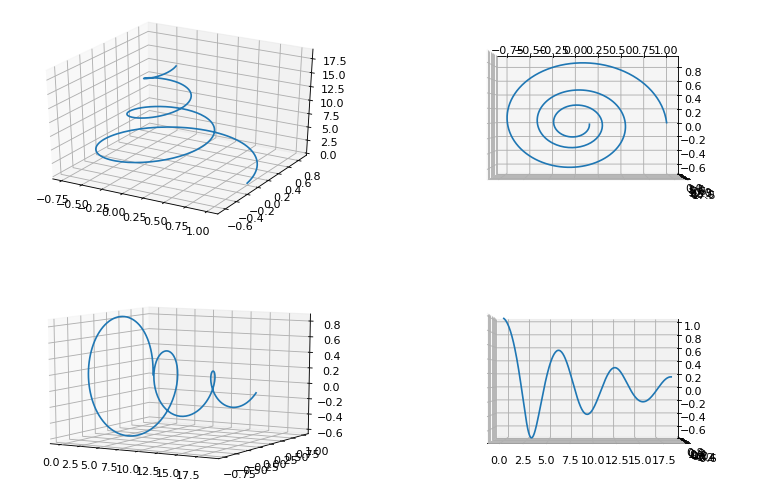

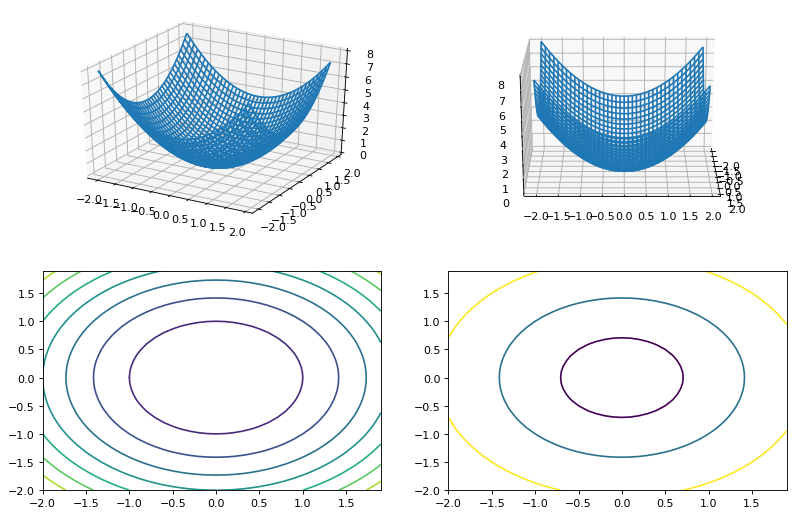

In [14]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

t = np.arange(0, 6*np.pi, np.pi/50)
expt = np.exp(-0.1 * t)
xt = expt * np.cos(t)
yt = expt * np.sin(t)

# dividing the plot into 2 x 2 sections
fig = plt.figure(figsize=(12,8), dpi=80)
ax = fig.add_subplot(221, projection='3d')
ax.plot(xt, yt, t)
ax.grid()
ax = fig.add_subplot(222, projection='3d')
ax.view_init(elev=90, azim=-90)
ax.plot(xt, yt, t)
ax.grid()
ax = fig.add_subplot(223, projection='3d')
ax.view_init(elev=10, azim=-60)
ax.plot(t, xt, yt)
ax.grid()
ax = fig.add_subplot(224, projection='3d')
ax.view_init(elev=0, azim=-90)
ax.plot(t, yt, xt)
ax.grid()

x = np.arange(-2, 2, .1)
y = np.arange(-2, 2, .1)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2
fig = plt.figure(figsize=(12,8), dpi=80)
ax = fig.add_subplot(221, projection='3d')
ax.plot_wireframe(X, Y, Z)
ax.grid()
ax = fig.add_subplot(222, projection='3d')
ax.view_init(elev=20, azim=0)
ax.plot_wireframe(X, Y, Z)
ax.grid()
ax = fig.add_subplot(223)
ax.contour(X, Y, Z)
ax = fig.add_subplot(224)
ax.contour(X, Y, Z, [0.5, 2, 4.5])

**Vectorization vs. loop iteration**

In [15]:
import numpy as np
import time

N = 1000
th = np.linspace(0, np.pi,  N)
start = time.time()
ss = np.sin(th[0])
for i in range(1, N):
    ss += np.sin(th[i])

print('result =', ss)
print('time cost for loop:', time.time()-start)

start = time.time()
ss = np.sum(np.sin(th))
print('result =', ss)
print('time cost for vectorization:', time.time()-start)

result = 635.9826284722278
time cost for loop: 0.0019876956939697266
result = 635.982628472229
time cost for vectorization: 0.0


**Estimate PI using Monte Carlo Method**
- Loop
- Vectorization
- Visualization

3.13828


"\n# loop\nSc = 0\nfor i in range(N):\n    x = np.random.rand(1)\n    y = np.random.rand(1)\n    pl.plot(x, y, '.')\n    pl.title('N = {}'.format(i))\n    _ = display.clear_output(wait=True)\n    _ = display.display(pl.gcf())\n    d = np.sqrt(x**2 + y**2)\n    if d <= 1:\n        Sc += 1\n\npl.close()\nSc / N * 4.0\n"

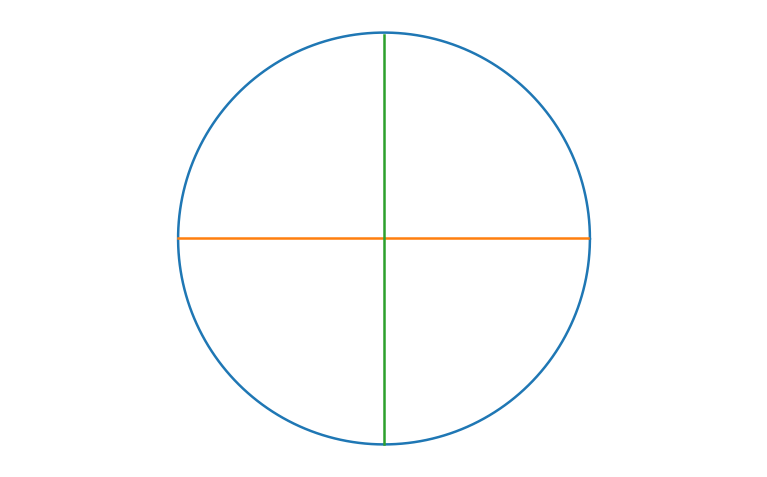

In [18]:
import numpy as np
import pylab as pl
from IPython import display

# plot the circle
x = np.arange(0, 2*np.pi, 0.01)

pl.figure(figsize=(8, 5), dpi=120)
pl.plot(np.cos(x), np.sin(x))
pl.grid()
x = np.arange(-1, 1, 0.01)
pl.plot(x, np.zeros(len(x)))
pl.plot(np.zeros(len(x)), x)
pl.axis('equal')
pl.axis('off')

# vectorization
N = 100000
x = np.random.rand(N)
y = np.random.rand(N)
d = np.sqrt(x**2 + y**2)
print(sum(d <= 1) / N * 4.0)

'''
# loop
Sc = 0
for i in range(N):
    x = np.random.rand(1)
    y = np.random.rand(1)
    pl.plot(x, y, '.')
    pl.title('N = {}'.format(i))
    _ = display.clear_output(wait=True)
    _ = display.display(pl.gcf())
    d = np.sqrt(x**2 + y**2)
    if d <= 1:
        Sc += 1

pl.close()
Sc / N * 4.0
'''

**Homework**
1. Write a function to compute the matrix multiplication using the following formula:

$$C\big(m,n\big)=\sum_{k=1}^{K}A\big(m,k\big)B\big(k,n\big)$$

Compare the speed of your function with NumPy `dot` function or MATLAB intrinsic `*` operator when the size of the matrix increases from 10 to ? (try to figure out the size limit of the matrix, or say, the memory limit of Python or MATLAB). Think about the step size used for increasing the matrices. Plot the results as computation cost vs. the size of the matrices.

2. Problem 1.16 on *Applied Numerical Methods Using MATLAB*
 - Make a routine (function) of **randu(N, a, b)**, which uses the Numpy or MATLAB function `rand()` to generate an *N*-dimensional random vector having the uniform distribution over $[a, b]$ and depicts the graph for the distribution of the elements of the generated vector in the form of histogram divided into 20 sections. Then, see what you get by typing the following statement into the MATLAB command window or Python REPL.
  `>> randu(1000, -2, 2)`
 - What is the height of the histogram on average?

3. Problem 1.20 on *Applied Numerical Methods Using MATLAB*
 -  Avoiding Large Errors / Overflow / Underflow